In [ ]:
import numpy as np
import pyvista
import pandas as pd
from func_list import GenPointer,Grad,Div,BC_Div,Laplace,BC_Laplace,Adv,pointer_mapping,CG_solver

In [ ]:
#### Various functions and their inputs/outputs
## Adv(qi, uBC_L, uBC_R, uBC_B, uBC_T, vBC_L, vBC_R, vBC_T, vBC_B,nu,iu,iv,nx,ny,dx,dy): return qo
## BC_Laplace(uBC_L, uBC_R, uBC_B, uBC_T, vBC_L, vBC_R, vBC_T, vBC_B,nu,iu,iv,nx,ny,dx,dy): return bcL
## Laplace(qi,nu,iu,iv,nx,ny,dx,dy ): return qo
## BC_Div(uBC_L, uBC_R, vBC_T, vBC_B,np,ip,nx,ny,dx,dy): return bcD
## Div(qi,np,nu,nx,ny,dx,dy,iu,iv,ip): return qo
## Grad(qi,np,nu,nx,ny,dx,dy,iu,iv,ip): return qo
## GenPointer(nx, ny): return ip,iu,iv

In [ ]:
nx = 5
ny = 6
## Pointer and Grid
ip, iu, iv = GenPointer(nx, ny)

dx = 1 / nx
dy = 1 / ny

np_ = nx * ny
nu = 2*nx*ny - nx - ny
dt=0.01
v=1.6


###Boundaries
uBC_L = 0
uBC_R = 0
uBC_B = 0
uBC_T = 1
vBC_L = 0
vBC_R = 0
vBC_T = 0
vBC_B = 0

p  = np.zeros((np_, 1))
u  = np.zeros((nu, 1))
qi = np.zeros((nu,1))
b  = np.zeros((nu,1))
bcL=BC_Laplace(uBC_L, uBC_R, uBC_B, uBC_T, vBC_L, vBC_R, vBC_T, vBC_B,nu,iu,iv,nx,ny,dx,dy)
bcD = BC_Div(uBC_L, uBC_R, vBC_T, vBC_B,np_,ip,nx,ny,dx,dy)

In [ ]:
iu

In [ ]:
bcD.shape

In [ ]:
qi=np.zeros((nu,1))
q0=Adv(qi, uBC_L, uBC_R, uBC_B, uBC_T, vBC_L, vBC_R, vBC_T, vBC_B,nu,iu,iv,nx,ny,dx,dy)

In [ ]:
q0

In [ ]:
pointer_mapping(iu)

In [ ]:
qi=np.zeros((np_,1))
#qo=Grad(qi,np_,nu,nx,ny,dx,dy,iu,iv,ip)
#qo=Div(qi,np_,nu,nx,ny,dx,dy,iu,iv,ip)
#qo=Laplace(qi,nu,iu,iv,nx,ny,dx,dy)

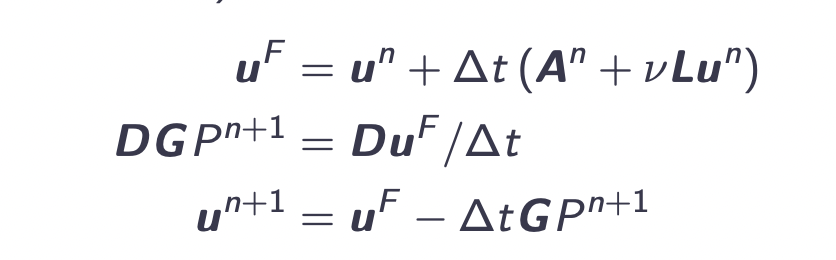

In [ ]:
A_n=Adv(qi, uBC_L, uBC_R, uBC_B, uBC_T, vBC_L, vBC_R, vBC_T, vBC_B,nu,iu,iv,nx,ny,dx,dy)
Lu_n=Laplace(qi,nu,iu,iv,nx,ny,dx,dy )+bcL

uf=qi + dt*(A_n+v*Lu_n)
D_rhs= (Div(uf,np_,nu,nx,ny,dx,dy,iu,iv,ip)+bcD)/dt


args=np_,nu,nx,ny,dx,dy,iu,iv,ip
GP=CG_solver(Div,D_rhs,u,args,dt,v,10)


#P = CG_solver(Grad,GP,qi,args,dt,v,10)

#u_n1=qi-dt*Grad(P,np_,nu,nx,ny,dx,dy,iu,iv,ip)

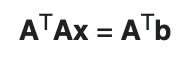

In [ ]:
matrix=[]
for i in range(nu):
    Q=np.zeros((nu,1))
    Q[i,0]=1
    #Div(qi,np,nu,nx,ny,dx,dy,iu,iv,ip)
    int_mat=Div(Q,np_,nu,nx,ny,dx,dy,iu,iv,ip)
    matrix.append(list(int_mat[:,0]))
matrix=np.array(matrix).T
matrx_data=pd.DataFrame(matrix)
matrx_data.columns=[i for i in matrx_data.columns]
matrx_data.index=[i for i in matrx_data.index]

In [ ]:
matrix.shape,Q.shape

In [ ]:
matrix.T@Q

In [ ]:
np.dot(matrix,Q).shape

In [ ]:
int_mat.shape

rhs=D_rhs
lhs=Div(qi,*args)
d_old=rhs-lhs
r_old=d_old

In [ ]:
D_rhs.shape

In [ ]:
lhs.shape

In [ ]:
qi.shape

In [ ]:
r_old.shape

In [ ]:


for i in range(cg_iter):
    intermediate_vec=Opt(d_old,*args)
    alpha_factor=((r_old.T)@r_old)/((d_old.T)@(intermediate_vec))

    qi=qi+(alpha_factor[0,0])*d_old
    r_new=r_old-(alpha_factor[0,0])*(intermediate_vec)

    beta=((r_new.T)@(r_new))/((r_old.T)@(r_old))
    d_new=r_new+(beta[0,0])*d_old
    d_old=d_new
    r_old=r_new
return qi

In [ ]:
u.shape

In [ ]:
## time stepping using fractial step
for it in range(nt):
    ## fractial step: stage 1
    RHS_b = S_operator(qi,nu,iu,iv,nx,ny,dx,dy,dt,v) + dt*(3*()-())/2 +dt*v*bcL
    uf    = CG_solver(Opt,b,qi,args,dt,v,cg_iter)
    
    ## fractial step: stage 2
    RHS_b = ?
    pnew  = CG() ;

    ## fractial step: stage 3 (assemble u_new)
    u_new = ?
    u = u_new ;

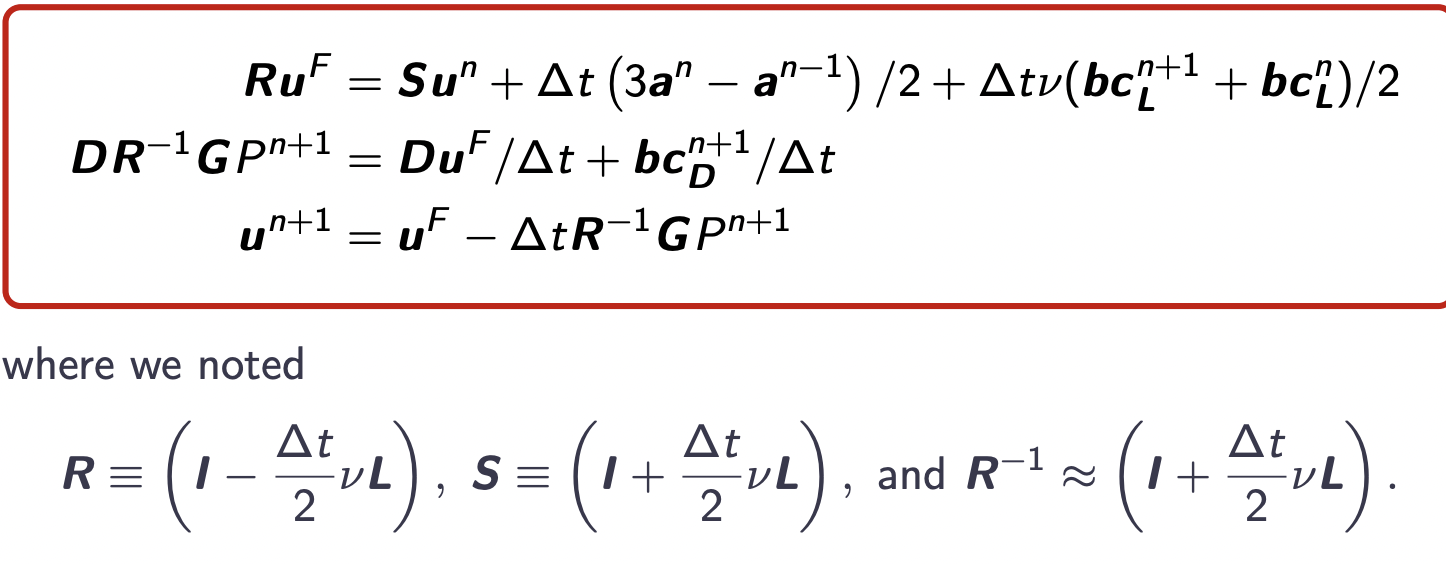

In [ ]:
##CG_solver(Opt,b,qi,args,dt,v,cg_iter):

In [ ]:
b=np.random.rand(np_,1)

In [ ]:
b=Div(qi,np_,nu,nx,ny,dx,dy,iu,iv,ip)

In [ ]:
b.shape

In [ ]:
args=np_,nu,nx,ny,dx,dy,iu,iv,ip
CG_solver(Div,b,qi,args,0.01,1,1)

In [ ]:
b.shape

In [ ]:
p.shape